In [175]:
# look at the TTS of various segments 
# date created: 3/3/2020
# author: sofia chelpon

In [275]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd
import xarray as xr 

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [177]:
############ --------------- LOAD SEGMENT DATA --------------- ###########
utbl_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/utbl_allseg_campavgbl.pkl')
mustar_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/mustar_allseg_campavgbl.pkl')
tau_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/tau_allseg_campavgbl.pkl')
t_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/t_allseg_campavgbl.pkl')
gf_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/gf_allseg_campavgbl.pkl')
seg_info = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/segment_info_campavgbl.pkl')
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/trcnames_allseg.pkl")

In [178]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx = np.ndarray.flatten(np.argwhere(seg_info['r squared'] >= 0.65))

seg_info_screened = seg_info.iloc[high_r2_idx]

# screen vars 
mustar_allseg_screened = mustar_allseg[high_r2_idx]
utbl_allseg_screened = utbl_allseg[high_r2_idx]
tau_allseg_screened = tau_allseg[high_r2_idx]
trcnames_allseg_screened = trcnames_allseg[high_r2_idx]

gf_allseg_screened = gf_allseg[high_r2_idx]
t_allseg_screened = t_allseg[high_r2_idx]

//anaconda3/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [179]:
############ --------------- FIND MIN/MAX CURVES --------------- ###########
min_mode_loc = np.argmin(seg_info_screened['mode age']) 
max_mode_loc = np.argmax(seg_info_screened['mode age']) 

min_mean_age = np.min(seg_info_screened['mean age']) 
max_mean_age = np.max(seg_info_screened['mean age']) 
print(min_mean_age, max_mean_age)

min_mode_age = np.min(seg_info_screened['mode age']) 
max_mode_age = np.max(seg_info_screened['mode age']) 
print(min_mode_age, max_mode_age)

# utbl  
min_utbl = utbl_allseg_screened[min_mode_loc].values
max_utbl = utbl_allseg_screened[max_mode_loc].values

min_r2 = np.min(seg_info_screened['r squared']) 
max_r2 = np.max(seg_info_screened['r squared']) 

min_mustar = mustar_allseg_screened[min_mode_loc].values
max_mustar = mustar_allseg_screened[max_mode_loc].values

min_tau = tau_allseg_screened[min_mode_loc].values
max_tau = tau_allseg_screened[max_mode_loc].values

min_gf = gf_allseg_screened[min_mode_loc].values
max_gf = gf_allseg_screened[max_mode_loc].values

min_t = t_allseg_screened[min_mode_loc].values
max_t = t_allseg_screened[max_mode_loc].values

print(seg_info_screened['mode age'].mean())
print(seg_info_screened['mean age'].mean())

1.9313806416355075 29.475308642015285
0.5390630472175808 7.7890630472175815
2.6206620060248653
9.947767865867842


//anaconda3/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)
//anaconda3/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [180]:
# look at the top 10, bottom 10 TTS sorted my mode 
ascend_mode = seg_info_screened.sort_values('mode age')
short10 = ascend_mode[:10]
long10 = ascend_mode[-10:]

In [181]:
# get positions 
pos = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/awas_positions.pkl')
pos = pos.drop('Notes', axis = 0).drop('Intrument', axis = 0)
pos_time = pos.iloc[0]
pos

,13,14,15,16,17,18,19,20,21,22,...,500,508,509,510,511,512,513,514,515,516
Time_UTC,2014-01-22 01:44:00,2014-01-22 01:55:15,2014-01-22 02:06:30,2014-01-22 02:17:45,2014-01-22 02:29:00,2014-01-22 02:37:56,2014-01-22 02:42:44,2014-01-22 02:53:59,2014-01-22 03:33:52,2014-01-22 03:48:51,...,2014-02-19 22:26:57,2014-02-22 00:37:11,2014-02-22 00:47:12,2014-02-22 00:57:11,2014-02-22 01:07:12,2014-02-22 01:15:43,2014-02-22 01:24:44,2014-02-22 01:33:43,2014-02-22 01:42:44,2014-02-22 01:51:44
Flight,RF05,RF05,RF05,RF05,RF05,RF05,RF05,RF05,RF05,RF05,...,RF13,RF14,RF14,RF14,RF14,RF14,RF14,RF14,RF14,RF14
GGALT,12926,12923.6,12921.9,12916.4,12914.6,13117.4,13216.8,13206.7,12583.3,12269.2,...,12181.9,13199.4,13195.1,13187.5,13189.9,13183.7,13193.9,13191.8,13191.4,13186.5
GGLAT,12.9142,14.3045,15.7397,17.1915,18.0103,18.0206,18.0233,18.0213,18.4552,18.4043,...,13.0018,10.1888,8.99355,7.77513,6.5507,5.49736,4.38237,3.28746,2.18603,1.09351
GGLON,149.354,149.771,150,150,149.25,148.102,147.489,146.06,140.831,142.302,...,158.339,145.234,145.348,145.457,145.565,145.63,145.757,145.854,145.95,146.046


In [182]:
# add lat/lon to the top and bottom 10 dataframes 
# create columns 
fill = np.empty(10)
fill[:] = np.nan

short10['GGALT'] = fill 
short10['GGLAT'] = fill 
short10['GGLON'] = fill 

# loop through every segment, match the time to the position and add it 
for idx in (np.arange(0, len(short10))):
    seg = short10.iloc[idx]
    time = seg.Time_UTC
    where = np.argwhere(pos_time.values == time)
    info = pos.iloc[:,[np.ndarray.item(where)]]
    short10['GGALT'].iloc[idx] = np.ndarray.item(info.iloc[2].values)
    short10['GGLAT'].iloc[idx] = np.ndarray.item(info.iloc[3].values)
    short10['GGLON'].iloc[idx] = np.ndarray.item(info.iloc[4].values)
    
short10 = short10.reset_index()
short10 = short10.drop(short10.columns[0], axis=1)
short10

//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Time_UTC,Flight,r squared,mean age,mode age,GGALT,GGLAT,GGLON
0,2014-01-29 00:49:20,RF07,0.675550,1.931381,0.539063,13160.794922,8.722885,149.440445
1,2014-01-29 00:53:09,RF07,0.745172,1.982815,0.539063,12562.297852,8.384974,149.758392
2,2014-01-29 03:49:44,RF07,0.784507,2.386737,0.539063,13021.497070,1.121225,147.631851
3,2014-01-25 01:06:11,RF06,0.695248,2.105795,0.539063,13143.195312,22.456902,148.032532
4,2014-01-29 04:04:41,RF07,0.712696,3.339008,0.789063,13922.432617,3.099352,147.177567
5,2014-01-29 03:53:02,RF07,0.836776,3.949039,1.039063,13824.146484,1.552756,147.559814
6,2014-02-19 19:54:49,RF13,0.774029,4.075299,1.039063,13235.946289,9.848100,160.289154
7,2014-01-22 04:33:40,RF05,0.774773,3.534931,1.039063,12279.331055,18.085150,148.329468
8,2014-02-19 19:48:48,RF13,0.752109,4.225354,1.039063,13234.548828,10.564475,160.441269
9,2014-02-19 20:06:49,RF13,0.816444,4.710753,1.289063,13235.797852,11.158109,160.159180


In [183]:
# add lat/lon to the top and bottom 10 dataframes 
# create columns 
long10['GGALT'] = fill 
long10['GGLAT'] = fill 
long10['GGLON'] = fill 

# loop through every segment, match the time to the position and add it 
for idx in (np.arange(0, len(long10))):
    seg = long10.iloc[idx]
    time = seg.Time_UTC
    where = np.argwhere(pos_time.values == time)
    info = pos.iloc[:,[np.ndarray.item(where)]]
    long10['GGALT'].iloc[idx] = np.ndarray.item(info.iloc[2].values)
    long10['GGLAT'].iloc[idx] = np.ndarray.item(info.iloc[3].values)
    long10['GGLON'].iloc[idx] = np.ndarray.item(info.iloc[4].values)
    
long10 = long10.reset_index()
long10 = long10.drop(long10.columns[0], axis=1)
long10

//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Time_UTC,Flight,r squared,mean age,mode age,GGALT,GGLAT,GGLON
0,2014-01-25 01:46:13,RF06,0.859988,22.539942,6.039063,13215.724609,27.874250,149.298111
1,2014-01-25 02:02:13,RF06,0.890918,23.948688,6.289063,13099.686523,30.041361,149.659866
2,2014-01-25 02:10:14,RF06,0.918461,26.733419,7.039063,13341.346680,31.108376,149.843704
3,2014-01-25 02:18:14,RF06,0.917307,27.369926,7.205122,13281.515625,32.123043,149.938889
4,2014-01-25 01:54:13,RF06,0.876634,27.369929,7.289063,13163.264648,28.952192,149.476135
5,2014-01-25 02:58:16,RF06,0.936450,28.037486,7.455122,13996.455078,27.564259,148.997681
6,2014-01-25 02:42:15,RF06,0.914612,28.738400,7.464449,13751.924805,29.521627,149.122604
7,2014-01-25 02:34:15,RF06,0.921046,28.738400,7.464449,13534.635742,30.514679,149.187622
8,2014-01-25 02:26:15,RF06,0.909843,29.475289,7.714449,13479.815430,31.376556,149.534821
9,2014-01-25 02:50:16,RF06,0.938245,29.475309,7.789063,13949.090820,28.535519,149.058990


In [276]:
# plot prep 
mypath = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_trace_gases.nc'
toga_trc = xr.open_dataset(mypath)
toga_trc

<xarray.Dataset>
Dimensions:               (GGALT: 2231, GGLAT: 2231, GGLON: 2231, Time: 2231, Time_UTC: 2231)
Coordinates:
  * Time                  (Time) datetime64[ns] 2014-01-17T00:18:06 ... 2014-02-22T09:20:05
  * GGALT                 (GGALT) float32 3127.166 4212.603 ... 3358.9587
  * GGLAT                 (GGLAT) float32 13.379817 13.258845 ... 12.707678
  * GGLON                 (GGLON) float32 144.9935 145.1362 ... 144.72903
  * Time_UTC              (Time_UTC) datetime64[ns] 2014-01-17T00:18:24 ... 2014-02-22T09:20:23
Data variables:
    Acetaldehyde          (Time) float32 ...
    n_Butane              (Time) float32 ...
    i_Butane              (Time) float32 ...
    Benzene               (Time) float32 ...
    C3H8                  (Time) float32 ...
    Methanol              (Time) float32 ...
    Bromoform             (Time) float32 ...
    Tetrachloroethylene   (Time) float32 ...
    Dibromomethane        (Time) float32 ...
    Dichloromethane       (Time) float32 ..

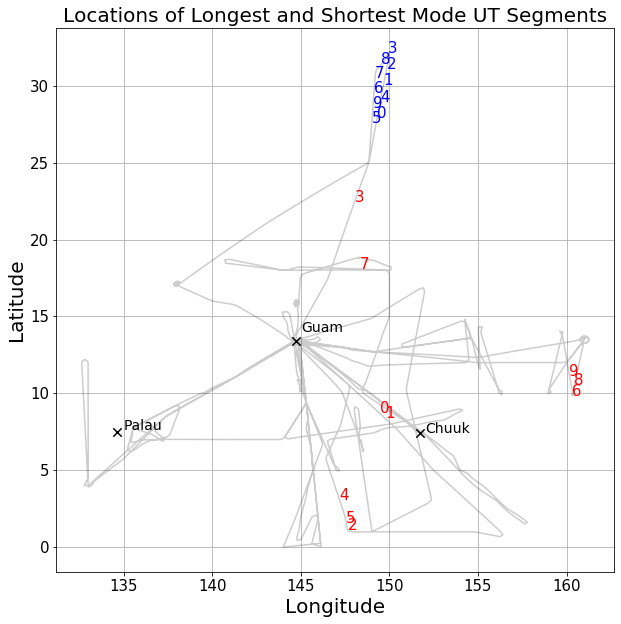

In [284]:
fig, ax = plt.subplots(figsize = [10, 10])
ax.scatter(long10.GGLON, long10.GGLAT, color = 'b', alpha = 0)
ax.scatter(short10.GGLON, short10.GGLAT, color = 'r', alpha = 0)
for i in np.arange(0, len(long10)):
    plt.text(long10.GGLON[i], long10.GGLAT[i], str(i), fontsize = 15, color = 'b')
    plt.text(short10.GGLON[i], short10.GGLAT[i], str(i), fontsize = 15, color = 'r')

ax.grid(which = 'major')
ax.set_title('Locations of Longest and Shortest Mode UT Segments', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 20)
ax.set_ylabel('Latitude', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# landmarks
# guam 
plt.scatter(144.7, 13.4, s = 70, marker = 'x', color = 'k')
plt.text(145, 14, 'Guam', fontsize = 14)
# chuuk 
plt.scatter(151.7, 7.4, s = 70, marker = 'x', color = 'k')
plt.text(152, 7.4, 'Chuuk', fontsize = 14)
# palau 
plt.scatter(134.6, 7.5, s = 70, marker = 'x', color = 'k')
plt.text(135, 7.6, 'Palau', fontsize = 14)

# 
plt.plot(toga_trc.GGLON, toga_trc.GGLAT, color = 'k', alpha = 0.2)
